In [1]:
#Importação das bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_blobs
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import pairwise_distances_argmin
from scipy.cluster.hierarchy import dendrogram

#criando o DataFrame "df_chem"
df = pd.read_csv("Minerals_Database3.csv")  # Importação do dataset para ser utilizado como dataframe
# Remoção de colunas não necessárias para o dataframe

df = df.drop(['A'], axis=1)
df = df.drop(['Name'], axis=1)

dados_cat = df.reindex(df.columns[[0,2,4]], axis = 1) # Remoção de dados categóricos
dados_categoricos = dados_cat.astype("category") # Tratamento de dados para o tipo categórico
newlist = [x for x in range(7,135)] # Range para pegarmos dados que estão em porcentagem
porcent_df = df.reindex(df.columns[newlist], axis = 1) # Coleta dos dados de elementos em porcentagem
df_chem = df.reindex(df.columns[[1,3,5,135,136,137]], axis=1) # Reindexação de um dataframe contendo apenas propriedades fisico-químicas
df_chem
df_chem, dados_categoricos

df_remove=df_chem.loc[(df_chem["Refractive Index"] == 0.000)] #remove as linhas (objetos), cujo valor do índice de refração é 0

df_chem = df_chem.drop(df_remove.index) #considera que o dataframe df_chem é o dataframe com as linhas removidas
print(df_chem)

     Mohs Hardness  Specific Gravity  Refractive Index  Molar Mass  \
0             4.50             3.240             1.580  817.339002   
1             2.75             3.446             1.592  435.069330   
2             2.00             4.420             2.085  921.092220   
4             5.50             1.050             1.634  861.185368   
5             3.50             3.295             1.457  225.618151   
..             ...               ...               ...         ...   
803           7.50             4.650             1.928  526.041800   
805           6.50             3.230             1.702  379.378178   
806           3.50             2.180             1.590  492.887716   
807           7.00             3.411             1.596  263.580584   
808           0.00             3.146             1.633  576.801907   

     Molar Volume  Calculated Density  
0        0.123390               5.498  
1        0.056083               6.439  
2        0.122631               6.234  

In [2]:
#no dado original, havia uma coluna sem nome (com os indexes). seria difícil remover assim. Nomeei-a de "A", para priorizar 
#o index do pandas.

# Função para normalizar todas as colunas de um dataframe pelo método de valor mínimo 0 e máximo 1
def normalizar(df):
    resultado = df.copy()
    for coluna in df.columns:
        if df[coluna].max() == 0:
            continue
        else:
            valor_max = df[coluna].max()
            valor_min = df[coluna].min()
            resultado[coluna] = (df[coluna] - valor_min) / (valor_max - valor_min)
    return resultado


In [3]:
# Computação e análise descritiva e estatística dos dados

# Valores de média, desvio padrão, mínimos e máximos, Q1, mediana e Q3
print(df_chem.describe())

# Moda do dataframe
df_chem.mode

       Mohs Hardness  Specific Gravity  Refractive Index   Molar Mass  \
count     588.000000        588.000000        588.000000   588.000000   
mean        3.879779          3.067937          1.712794   474.243503   
std         1.964125          1.552768          0.241588   470.660380   
min         0.000000          0.000000          0.989000    25.011580   
25%         2.500000          2.394750          1.570000   190.132605   
50%         3.500000          3.050000          1.646000   330.319673   
75%         5.500000          3.750500          1.773000   573.779844   
max         9.500000          9.593000          3.383000  4079.341200   

       Molar Volume  Calculated Density  
count    588.000000          588.000000  
mean       0.099284            4.793639  
std        0.102466            2.706052  
min        0.011040            0.635000  
25%        0.033789            2.778750  
50%        0.067282            4.145000  
75%        0.123304            6.240250  
max   

<bound method DataFrame.mode of      Mohs Hardness  Specific Gravity  Refractive Index  Molar Mass  \
0             4.50             3.240             1.580  817.339002   
1             2.75             3.446             1.592  435.069330   
2             2.00             4.420             2.085  921.092220   
4             5.50             1.050             1.634  861.185368   
5             3.50             3.295             1.457  225.618151   
..             ...               ...               ...         ...   
803           7.50             4.650             1.928  526.041800   
805           6.50             3.230             1.702  379.378178   
806           3.50             2.180             1.590  492.887716   
807           7.00             3.411             1.596  263.580584   
808           0.00             3.146             1.633  576.801907   

     Molar Volume  Calculated Density  
0        0.123390               5.498  
1        0.056083               6.439  
2      

### Sobre a análise estatística

Vimos que o índice refrativo e a massa apresentaram diferença signifcativa, o que era o esperado pois esperávamos, uma vez que a massa pode assumir valores muiot maiores que o índice refreação, fisicmante falando.
Além disso, foi somente depois que percebemos que a maior parte dos dados são qualitativos, ao invés de quantitaivos.

In [4]:
# Matriz de Covariância: 
df_covariado = df_chem.cov()
df_covariado

,Mohs Hardness,Specific Gravity,Refractive Index,Molar Mass,Molar Volume,Calculated Density
Mohs Hardness,3.857785,0.203096,0.045048,-60.367321,-0.025089,0.155263
Specific Gravity,0.203096,2.411090,0.196183,-34.369715,-0.035864,1.741854
Refractive Index,0.045048,0.196183,0.058365,1.720074,-0.004660,0.251216
Molar Mass,-60.367321,-34.369715,1.720074,221521.192847,34.643922,265.962792
Molar Volume,-0.025089,-0.035864,-0.004660,34.643922,0.010499,-0.082447
Calculated Density,0.155263,1.741854,0.251216,265.962792,-0.082447,7.322716


In [5]:
# Normalização dos dados na relaçãao de 0 a 1

df_normalizado = normalizar(df_chem)
df_normalizado

,Mohs Hardness,Specific Gravity,Refractive Index,Molar Mass,Molar Volume,Calculated Density
0,0.473684,0.337746,0.246867,0.195427,0.093724,0.366797
1,0.289474,0.359220,0.251880,0.101141,0.037575,0.437773
2,0.210526,0.460753,0.457811,0.221018,0.093091,0.422311
4,0.578947,0.109455,0.269424,0.206242,0.084284,0.433172
5,0.368421,0.343480,0.195489,0.049480,0.028236,0.266782
...,...,...,...,...,...,...
803,0.789474,0.484728,0.392231,0.123579,0.056249,0.371776
805,0.684211,0.336704,0.297828,0.087404,0.074954,0.187509
806,0.368421,0.227249,0.251044,0.115402,0.056331,0.344848
807,0.736842,0.355572,0.253551,0.058843,0.065417,0.136597


In [6]:
#relação de Pearson
def Pearson(DataFrame):
    data = DataFrame
    data.shape
    
    corrmat = data.corr()
    f, ax = plt.subplots(figsize =(15, 8))
    sns.heatmap(corrmat, ax = ax, cmap ="RdYlBu", linewidths = 0.1, vmin=-1, vmax=1, annot=True)

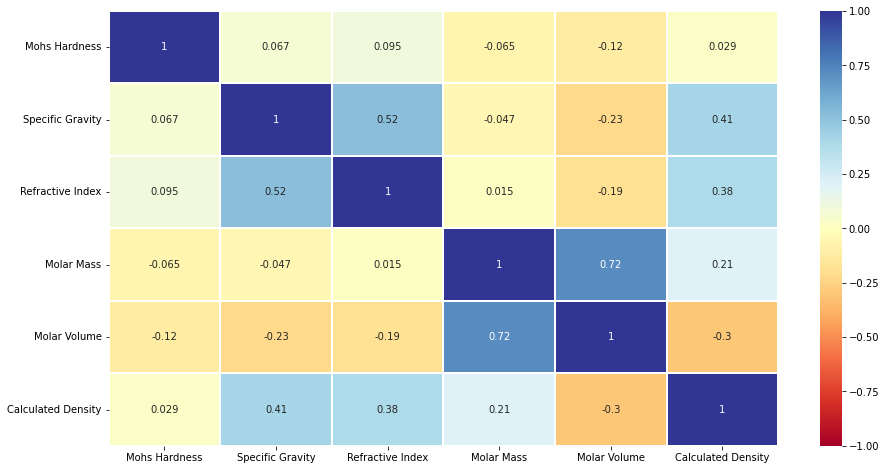

In [7]:
Pearson(df_normalizado)

In [8]:
#correlação de Spearman
import numpy as np
from scipy.stats import spearmanr #x e y
def Spearman(DataFrame, tam_matrizx,tam_matrizy):
    matriz = np.zeros((tam_matrizx,tam_matrizy))
#spearmat = pd.DataFrame(a,columns=df_chem.columns)
#print(a)
    for i in range(0,tam_matrizx):
        for j in range(0,tam_matrizy):
            if i >= j:
                x = DataFrame.iloc[:,i]
                y = DataFrame.iloc[:,j]
            
                dados_tratados = spearmanr(x,y)[0]
            #print(b)
                matriz[i,j] = dados_tratados
                matriz[j,i] = dados_tratados
            
    spearmat = pd.DataFrame(matriz,columns=DataFrame.columns, index=DataFrame.columns)            
    f, ax = plt.subplots(figsize =(15, 8))
    sns.heatmap(spearmat, ax = ax, cmap ="RdYlBu", linewidths = 0.1, vmin=-1, vmax=1, annot=True)


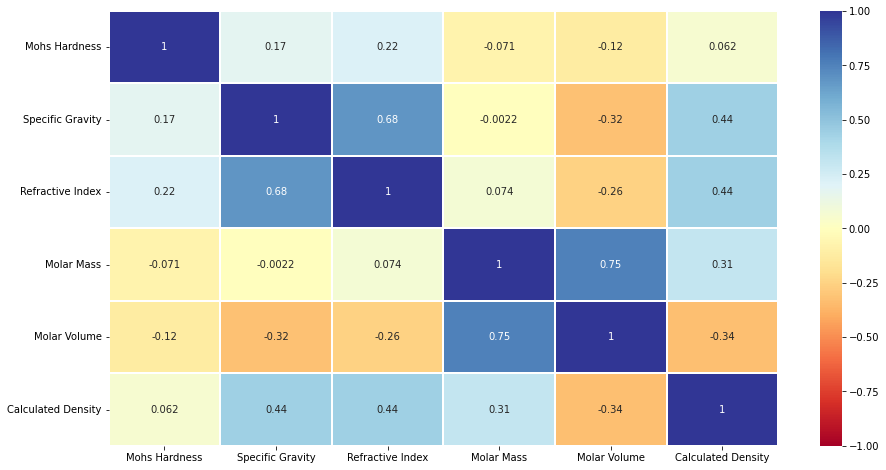

In [10]:
Spearman(df_normalizado,6,6)

## Desse modo, não há uma grande diferença entre a matriz de correlação de Pearson e de Spearman, o que pode implicar na linearidade dos dados.

,Mohs Hardness,Specific Gravity,Refractive Index,Molar Mass,Molar Volume,Calculated Density
0,0.473684,0.337746,0.246867,0.195427,0.093724,0.366797
1,0.289474,0.359220,0.251880,0.101141,0.037575,0.437773
2,0.210526,0.460753,0.457811,0.221018,0.093091,0.422311
4,0.578947,0.109455,0.269424,0.206242,0.084284,0.433172
5,0.368421,0.343480,0.195489,0.049480,0.028236,0.266782
...,...,...,...,...,...,...
803,0.789474,0.484728,0.392231,0.123579,0.056249,0.371776
805,0.684211,0.336704,0.297828,0.087404,0.074954,0.187509
806,0.368421,0.227249,0.251044,0.115402,0.056331,0.344848
807,0.736842,0.355572,0.253551,0.058843,0.065417,0.136597


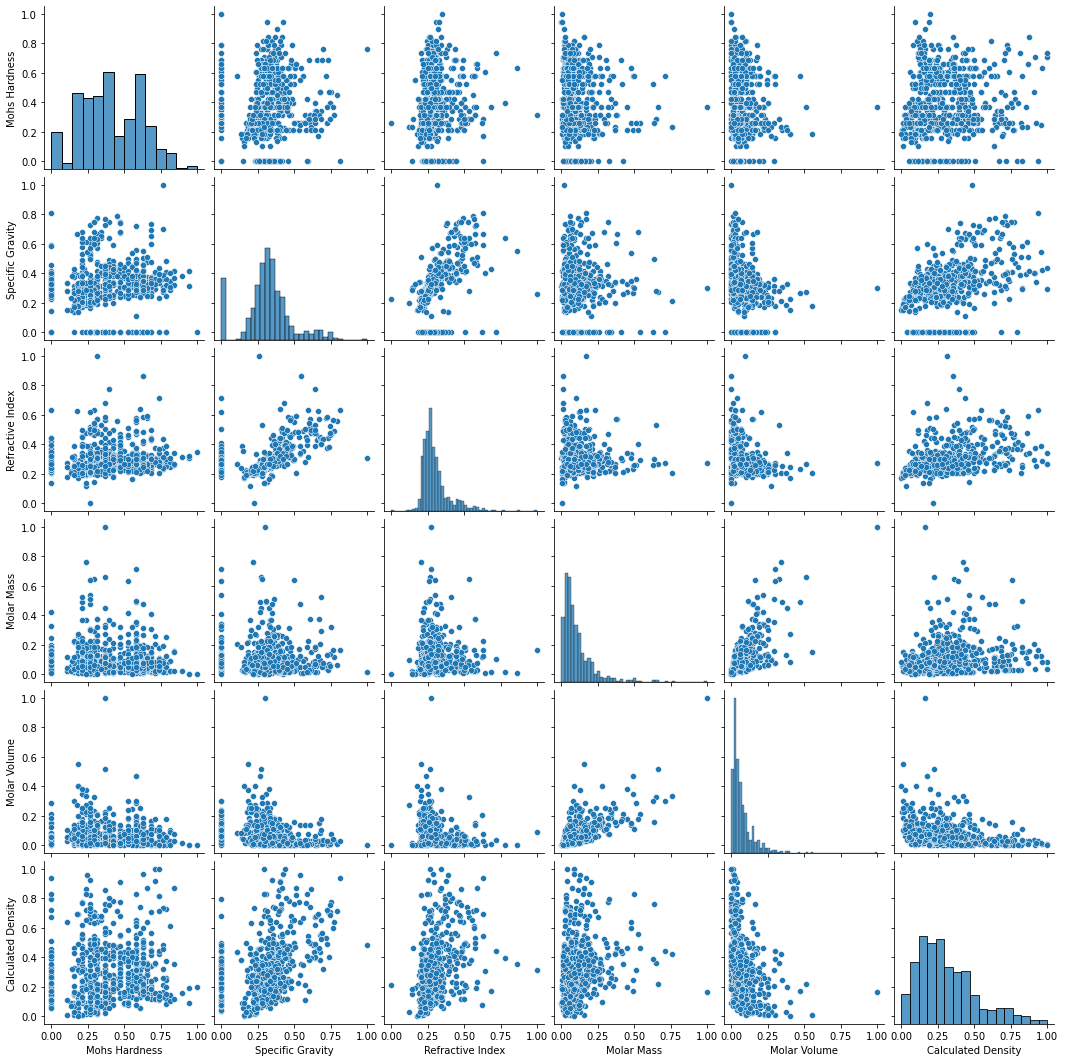

In [11]:
sns.pairplot(data = df_normalizado)
df_normalizado

<AxesSubplot:xlabel='Mohs Hardness', ylabel='Refractive Index'>

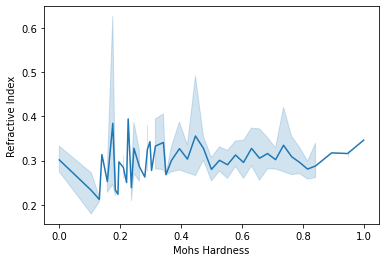

In [12]:
sns.lineplot(data = df_normalizado, y='Refractive Index', x='Mohs Hardness')

<AxesSubplot:xlabel='Refractive Index', ylabel='Specific Gravity'>

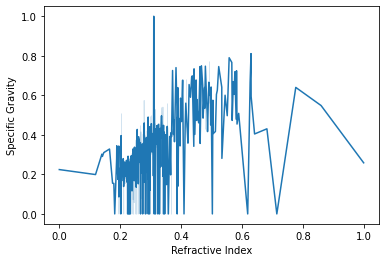

In [13]:
sns.lineplot(data = df_normalizado, x='Refractive Index',y='Specific Gravity')

**Estrutura cristalina:** 0.05-Triclinic,0.15-Monoclinic, 0.30-Orthorhombic, 0.45-Tetragonal, 0.60-Hexagonal, 0.75-Trigonal,0.9-Cubic, 1-Amorphous.

**Mohs Hardness:** 0.3-Baixa dureza, 1-Extrema dureza

**Diafaneidade:** 0.3-Opaco, 0.6-Translúcido, 1-Transparente

**Ótica:** 0.25-Anisotrópico, 0.5-Isotrópico, 0.75-Uniaxial, 1-Biaxial

**Índice refrativo:** 0-Não refrate muita luz, 1-Refrate muita luz

**Dispersão:** 0-Frequência de mudança do índice refrativo baixa, 1-Frequência de mudança do índice refrativo alta

**Gravidade Específica:** 0-Densidade do material dividido pela densidade da água muito baixa, 1-Densidade do material dividido pela densidade da água alta